## Assignment 1| Data Sciecne in Python | Mohammad Syed

In [1]:
#makes figures clearer
%config InlineBackend.figure_format = 'svg'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Introduction
The purpose of this assignment is to investigate Global Warming factors such as Global Temprature Anamolies, Carbon Dioxide, Nitrous Oxide and Methance Concentration and the rate at which the ice caps are melting.  

### API's Used
The API used to gather global warming data is the [Global Warming API](https://global-warming.org/)

note : The API does not require a key or account so the notebook should run regardless, However if this is not the case, then the respective JSON files are also provided and the reader is prompted to go to the [JSON](#json) section and uncomment the last 3 lines in the cell, if the csv files exist in the folder the notebook should run 

In [2]:
#Packages used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import json
from  scipy  import stats

In [3]:
#function that returns the data when given an API link
def getData(link):
    with urllib.request.urlopen(link) as response:
        return json.loads(response.read())   #returns a json dict values

In [4]:
#API links strings
temp_api = 'https://global-warming.org/api/temperature-api'
co2_api = 'https://global-warming.org/api/co2-api'
methane_api = 'https://global-warming.org/api/methane-api'
nitro_api = 'https://global-warming.org/api/nitrous-oxide-api'
ice_caps_api = ' https://global-warming.org/api/arctic-api'

In [5]:
#getting the data 
temp_data = getData(temp_api)
co2_data = getData(co2_api)
m_data = getData(methane_api)
nitro_data = getData(nitro_api)
ice_data = getData(ice_caps_api)

## Processing of Data
#### Temprature
For temprature, the pre procesing required is to cut out all the information before the 1st of January 2011
and also changing the index of the data to Time.


In [6]:
del temp_data['error']                                                #removing error key from temprature values
temp_df = pd.DataFrame(temp_data['result'])                           #turning the dictionary in to a data frame
temp_df=temp_df.astype(float)   #typecasting all values to float which is needed for the next step                                        
temp_df = temp_df.drop(temp_df[temp_df.time <1950].index).set_index('time') #deleting all values before 1950

In [7]:
#temp_df

#### Ice Caps
the error key is removed and the dataframe is typecast to a float

In [8]:
del ice_data['error']                                #removing error key
ice_df = pd.DataFrame(ice_data['result'])            #turning the dictionary in to a data frame 
ice_df['year'] = ice_df['year'].astype(float)        #typecasting all values to float
ice_df = ice_df.set_index('year')

In [9]:
#ice_df

#### Carbon Dioxide Levels
To process the Co2 levels we are going to add a pandas date range of 'y' and set it as an index, This is more efficenient than dealing with the 'year,month,day' columns that are retruned from the API. These columns will be dropped. This data frame will show the concentration of Co2 every day from the 1st of January 2011

In [10]:
co2_df = pd.DataFrame(co2_data['co2'])
co2_df = co2_df.astype(float)                                #typecasting all values to float
y = pd.date_range(start='1/1/2011', periods=3738, freq='d')  # setting a pandas date range to act as an index
co2_df= co2_df.astype(float).drop(columns=['year','month','day']).set_index(y)    # dropping y,m,d and setting my own index based off the data
co2_df = co2_df.groupby(pd.Grouper(freq='M')).nth(0)     #the df is gropuped by month and only the first day is taken
co2_df = co2_df[~(co2_df.index > '2020-11-30')]

In [11]:
#co2_df

#### Nitrous Oxide Levels
In a similar fashion to the Carbon Dioxide level, I added a pandas date range of 'x', which goes up monthly from the 1st of January 2011

In [12]:
x = pd.date_range(start='1/1/2011', periods=119, freq='M')         # setting a pandas date range to act as an index
no2_df = pd.DataFrame(nitro_data['nitrous'])     
no2_df = no2_df.astype(float)                                      #typecasting all values to float
no2_df = no2_df.drop(no2_df[no2_df.date < 2011].index)             #dropping all values before 2011
no2_df = no2_df.drop(columns=['date','averageUnc','trendUnc']).set_index(x) #dropping values not needed

In [13]:
#no2_df

#### Methane Levels
Methane is changed in the same way at Nitrous Oxide

In [14]:
m_df = pd.DataFrame(m_data['methane'])
m_df = m_df.astype(float)                                                                                   #typecasting all values to float
m_df = m_df.drop(m_df[m_df.date < 2011].index).drop(columns=['date','averageUnc','trendUnc']).set_index(x)  #dropping values not needed


In [15]:
#m_df 

#### Total Gas
Now all the gas dataframes will be combined in to 1

In [16]:
gas_df = pd.DataFrame()                      
gas_df['Co2 Cycle' ] = list(co2_df.cycle)
gas_df['Co2 Trend' ] = list(co2_df.trend)
gas_df['No2 Cycle' ] = list(no2_df.average)
gas_df['No2 Trend' ] = list(no2_df.trend)
gas_df['Methane Cycle' ] = list(m_df.average)
gas_df['Methane Trend' ] = list(m_df.trend)
gas_df = gas_df.set_index(x)

In [17]:
#gas_df.head(5)

## JSON STORAGE
<a id = 'json'> </a>
JSON stored here if API doesnt work

In [18]:

temp_df.to_json('temp.json')
ice_df.to_json('ice.json')
gas_df.to_json('gas.json')

# Uncomment this if any error occours
gas_df = pd.read_json('gas.json' )
ice_df = pd.read_json('ice.json',convert_dates=False,convert_axes=False)
temp_df = pd.read_json('temp.json',convert_dates=False,convert_axes=False)



In [19]:
#gas_df.head(5)

In [20]:
#temp_df.head(5)

In [21]:
#ice_df.head(5)

## Data Analysis and Visulisation

Text(0, 0.5, 'Temprature Anamoly (Celcius)')

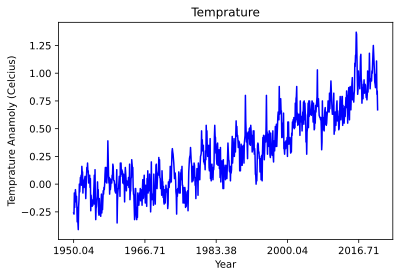

In [22]:
p = temp_df['land'].plot(label ='Temprature',color = 'blue')
p.set_title('Temprature')
p.set_xlabel("Year")
p.set_ylabel("Temprature Anamoly (Celcius)")



The temprature anamoly refers to the change in temprature to a set reference temprature.  We can see that the temprature anamoly is increasing from year to year. Global warming as a phenomona comes from the trapped sunlight in at atmosphere due to the gasses present. The fluctuations come from the fact that gases concentration are also fluctuating. This is investigated below.

Text(0.5, 0, 'Year')

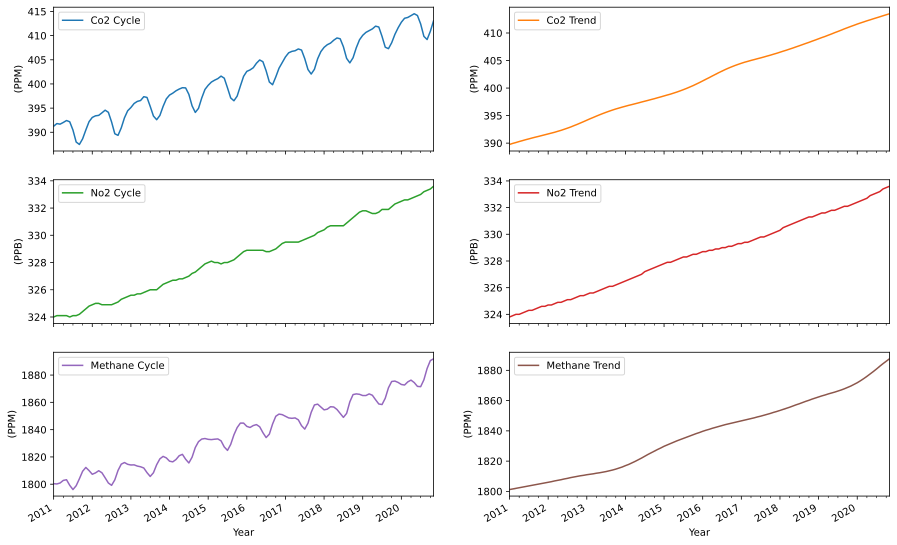

In [23]:
plots = gas_df.plot(kind='line', subplots=True, layout=(3,2) , figsize=(15,10))
plots[0, 0].set_ylabel("(PPM)")
plots[0, 1].set_ylabel('(PPM)')
plots[1, 0].set_ylabel('(PPB)')
plots[1, 1].set_ylabel('(PPB)')
plots[2, 0].set_ylabel('(PPM)')
plots[2, 1].set_ylabel('(PPM)')
plots[2, 0].set_xlabel('Year')
plots[2, 1].set_xlabel('Year')

From them above figure we can note a number of things:
- We can see over a period of ten years that the concentration of gasses is steadily increasing.
- The period at which gas concentrations are high we see a spike in temprature. When they are low we see a drop in temprature.
- That the gas concentrations of the earth have a cycle. The carbon dioxide gas nearly resembles the shape of a sine wave. This interesting shape comes from the seasonal differences. Photosynthesis in the Amazon rainforest converts sunlight in to food using carbon dioxide and water. When carbon dioxide levels is at the top of its amplitude, this implies a period of low photosynthesis which typically would imply winter time. and vice versa -> when at its troph, this implies a period of high photosynthesis.
- A similar argumemt can be made about methane as the biggest producers of methane is agricultural industry which have a summer time and a winter time. We can see that the trophs and peaks line up for all the gasses, furthermore when the permafrost melts in the ice caps this releases more methane in to the atmosphere. This is investigate below.



Text(0, 0.5, 'Million Square Kilometers')

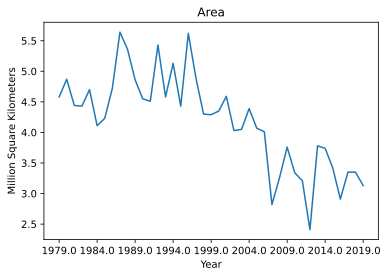

In [24]:
p = ice_df['area'].plot(title="Area")
p.set_xlabel("Year")
p.set_ylabel("Million Square Kilometers")

We can see that the area of the ice caps are melting and freezing every year. They take a simmilar pattern as the graphs for temprature and gas concentration.

We can see from above that all the above items are linked. The rise in gas concentration in the atmosphere leads to an increase of global temprature would then cause more melting of the ice caps which in turn relases more methane in to the atmosphere. 

### Linear Regression
We shall now attempt to do a linear regression of the temprature data set. A linear regression was carried out to obtain a y = mx + c relationship, using this linear model we can predict what temprature anamolies occour at what time  

In [25]:
y = np.array(temp_df.land).astype(np.float)    #dependant varaible
x =  np.array(temp_df.index).astype(np.float)   #Independant variable

In [26]:
m, c, r, p, std_err = stats.linregress(x, y)
x1 = np.array(x)
x1 = x1*m


In [27]:
m

0.015116721404963453

In [28]:
c

-29.718884217010196

Text(0, 0.5, 'Temprature Anamoly')

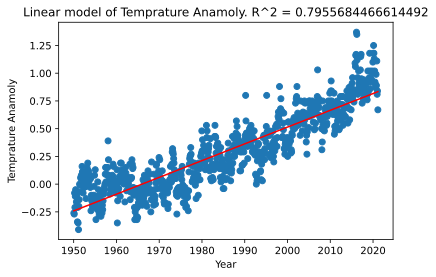

In [29]:
plt.scatter(x,y)
plt.plot(x,x1+c,'-r')
plt.title('Linear model of Temprature Anamoly. R^2 = ' + str(r**2))
plt.xlabel('Year')
plt.ylabel('Temprature Anamoly')

- We see a R^2 value of 0.7955. This indicated a strong positive correlation between the 2 variables. However it is important to note that correlation does not mean causation, obviously it is silly to say that the increase of dates will lead to an increase of temprature anamoly. The obvious external factor to a rise in temprature is the increasing concentration of gasses in the air. 
- The linear model has the equation: Temprature Anamoly = Year*(0.01511) - 29.7188
- Let Temprature anamoly equal +2
- Solving for the year we get a value of 2099.1925
- This means the linear model states by 2099 the tempraure anamoly will reach 2 Degrees

We shall now attempt to do a linear regression of Ice cap data set.

In [30]:
y = np.array(ice_df.area).astype(np.float)    #dependant varaible
x =  np.array(ice_df.index).astype(np.float)   #Independant variable

In [31]:
m, c, r, p, std_err = stats.linregress(x, y)
x1 = np.array(x)
x1 = x1*m


In [32]:
m

-0.04821428571428573

In [33]:
c

100.56669860627181

Text(0, 0.5, 'Million Square Kilometers')

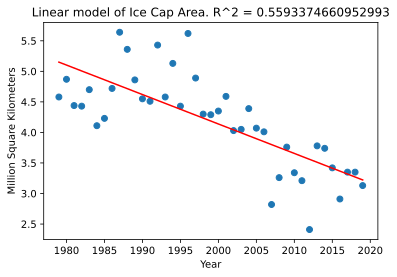

In [34]:
plt.scatter(x,y)
plt.plot(x,x1+c,'-r')
plt.title('Linear model of Ice Cap Area. R^2 = ' + str(r**2))
plt.xlabel('Year')
plt.ylabel('Million Square Kilometers')

- We see a R^2 value of 0.56. This indicated a weak positive correlation between the 2 variables.
- The linear model has the equation: Area = Year*(-0.04821) - 100.566
- Let the area equal 0
- The resulting year is 2086
- This means the linear model states by 2086 the area of the ice caps will be 0

### Conclusions and Recomendations for Future work

- It is seen that currently the Trends for average global tempreture does not look good. 
- According to the United Climate Change Conference in 2009 in Copenhagen, an increase of temperature of the mean surface area of the earth by 2°C would lead to a series of environmental catastrophes such as acidified oceans, an increase in global temperature and other events described as “dangerous climate change” and “catastrophic greenhouse effect” [1].S. W. L. D. Richardson K, “Climate Change: Global Risks, Challenges and Decisions,” United Kingdom, Cambridge University Press, 2011.
- The melting of the ice caps will lead to in incease of sea level (up to 70 meters)
- It looks like there is a never ending cycle where; The burning of fossil fuels leads to an increase in temprature which causes an increase of the melting of the ice caps which cuases even more
- methane to be released from the permafrost. 
- The moddelling above is a linear model. To be more accurate an exponential analysis must be done to get a more accurate result. The exponential analysis may result in the times moving up quicker
- Also to use another API and get O2 concentrations in the air, We should see that the Co2 and O2 act as Sine and Cosine Waves that are in phase.
